# Cursos de Series de tiempo con *Machine Learning*
## Modulo 10.1. Introducción a modelo Arima
                        Elaborado por: Naren Castellon

# **Modelo Arima**

Un modelo Arima, significa **promedio movil(MA) integrado(I) autorregresivo(AR)**, es un modelo estadístico que utiliza datos de series de tiempo para comprender mejor el conjunto de datos o para predecir tendencias futuras. Es una forma de análisis de regresión que mide la fuerza de una variable dependiente en relación a otra variable cambiante

La modelación ARIMA, puede pronosticar una serie de tiempo utilizando los valores pasados de la serie. En esta sección, construimos un modelo ARIMA óptimo desde cero y lo ampliamos a los modelos Seasonal ARIMA (SARIMA) y SARIMAX. También verá cómo construir modelos de autoarima en python.

## **Naren Castellon**
## **19 de julio 2021**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


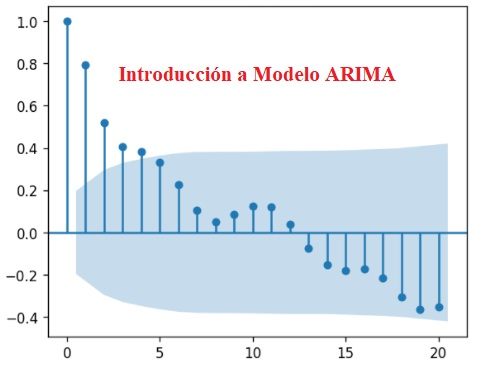

In [2]:
#@title
from IPython.display import Image
Image("/content/drive/MyDrive/_Curso Serie de tiempo/imagen/Intro_model-arima.jpg")

**Contenido**

1. Introducción a la predicción de series de tiempo
2. Introducción a los modelos ARIMA
3. ¿Qué significan p, d y q en el modelo ARIMA?
3. ¿Qué son los modelos AR y MA?
4. Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA
5. Cómo encontrar el orden del término AR (p)
6. Cómo encontrar el orden del término MA (q)
7. Cómo manejar si una serie de tiempo está ligeramente por debajo o por encima de la diferencia
7. Cómo construir el modelo ARIMA
8. Cómo encontrar el modelo ARIMA óptimo manualmente mediante la validación cruzada fuera de tiempo
9. Métricas de precisión para el pronóstico de series de tiempo
10. Cómo hacer Auto Arima Forecast en Python
11. Cómo interpretar las gráficas de residuos en el modelo ARIMA
12. Cómo construir automáticamente el modelo SARIMA en Python
13. Cómo construir el modelo SARIMAX con variable exógena

## **1. Introducción a la predicción de series de tiempo.**
Una serie de tiempo es una secuencia en la que se registra una métrica en intervalos de tiempo regulares.

Dependiendo de la frecuencia, una serie de tiempo puede ser 
* anual (por ejemplo, presupuesto anual), 
* trimestral (por ejemplo, gastos), 
* mensual (por ejemplo, tráfico aéreo), 
* semanal (por ejemplo, cantidad de ventas), 
* diaria (por ejemplo, clima), 
* por hora. (p. ej., precio de las acciones), 
* minutos (p. ej., llamadas entrantes en un galope de llamadas) e incluso 
* segundos (p. ej., tráfico web).

**¿Por qué es necesario pronosticar?**

Porque, pronosticar una serie de tiempo (como la demanda y las ventas) a menudo tiene un valor comercial tremendo.

En la mayoría de las empresas de fabricación, impulsa las actividades fundamentales de planificación empresarial, adquisiciones y producción. Cualquier error en los pronósticos se extenderá a lo largo de la cadena de suministro o en cualquier contexto comercial. Por lo tanto, es importante que los pronósticos sean precisos para ahorrar costos y es fundamental para el éxito.

No solo en la fabricación, las técnicas y conceptos detrás de la previsión de series de tiempo son aplicables en cualquier negocio.

Ahora, la predicción de una serie de tiempo se puede dividir en dos tipos.

* Si usa solo los valores anteriores de la serie de tiempo para predecir sus valores futuros, se llama **Pronóstico de serie de tiempo univariante.**

* Y si utiliza predictores distintos de la serie (también conocidos como variables exógenas) para pronosticar, se denomina **Pronóstico de series de tiempo multivariable.**

## **2. Introducción a los modelos ARIMA**
Entonces, ¿qué es exactamente un modelo ARIMA?

ARIMA, su abreviatura significa **Autorregresivo(AR) integrada(I) Media móvil(MA)** es en realidad una clase de modelos que 'explica' una serie de tiempo determinada en función de sus propios valores pasados, es decir, sus propios retrasos y los errores de pronóstico retrasados, de modo que se puede utilizar la ecuación para pronosticar valores futuros.

Cualquier serie de tiempo **"no estacional"** que muestre patrones y no sea un **"ruido blanco"** aleatorio se puede modelar con modelos ARIMA.

Un modelo ARIMA se caracteriza por 3 términos: p, d, q

dónde,

* p: es el orden del término AR

* q: es el orden del término MA

* :d es el número de diferenciaciones necesarias para que la serie de tiempo sea estacionaria

Si una serie de tiempo tiene patrones estacionales, entonces necesita agregar términos estacionales y se convierte en SARIMA, abreviatura de "Seasonal ARIMA". Más sobre eso una vez que terminemos ARIMA.

Entonces, ¿qué significa el 'orden del término AR'? Antes de ir allí, veamos primero el término 'd'.

## **3. ¿Qué significan p, d y q en el modelo ARIMA?**
El primer paso para construir un modelo ARIMA es hacer que la serie temporal sea estacionaria .

¿Por qué?

Porque, el término 'Auto regresivo' en ARIMA significa que es un modelo de regresión lineal que usa sus propios rezagos como predictores. Los modelos de regresión lineal, como sabemos, funcionan mejor cuando los predictores no están correlacionados y son independientes entre sí.

Entonces, **¿cómo hacer estacionaria una serie?**

El enfoque bastante común es **diferenciarlo**. Es decir, restamos el valor anterior del valor actual. A veces, dependiendo de la complejidad de la serie, es posible que se necesite más de una diferenciación.

El valor de d, por lo tanto, es el número mínimo de diferenciaciones necesarias para que la serie sea estacionaria. Y si la serie de tiempo ya es estacionaria, entonces $d = 0$.

A continuación, ¿cuáles son los términos 'p' y 'q'?

'p' es el orden del término 'Auto regresivo' (AR). Se refiere al número de rezagos de $Y$ que se utilizarán como predictores. Y 'q' es el orden del término 'Media móvil' (MA). Se refiere al número de errores de pronóstico retrasados que deben incluirse en el modelo ARIMA.

## **4. ¿Qué son los modelos AR y MA?**
Entonces, ¿qué son los modelos AR y MA? ¿Cuál es la fórmula matemática real para los modelos AR y MA?

Un modelo auto regresivo puro (solo AR) es aquel en el que $Y_t$ depende solo de sus propios retrasos. Es decir, $Y_t$ es una función de los 'rezagos de $Y_t$.

$$Y_t=\alpha+\beta_1 Y_{t-1}+\beta_2 Y_{t-2}+\cdots+\beta_p Y_{t-p}+\epsilon_1 $$

donde, $Y_{t-1} $ es el rezago1 de la serie, $\beta 1 $ es el coeficiente de rezago1 que estima el modelo y $\alpha $ es el término de intersección, también estimado por el modelo.

Del mismo modo, un modelo puro de media móvil (solo MA) es uno en el que $Y_t$ depende solo de los errores de pronóstico retrasados.

$$Y_t=\alpha+\epsilon_t+\phi_1 \epsilon_{t-1}+\phi_2 \epsilon_{t-2}+\cdots+\phi_q \epsilon_{t-q}$$

donde los términos de error son los errores de los modelos autorregresivos de los respectivos rezagos. Los errores $e_t$ y $e(t-1)$ son los errores de las siguientes ecuaciones:

$$Y_t=\beta_1 Y_{t-1}+\beta_2 Y_{t-2}+\cdots+\beta_0 Y_{0}+\epsilon_t $$

$$Y_{t-1}=\beta_1 Y_{t-2}+\beta_2 Y_{t-3}+\cdots+\beta_0 Y_{0}+\epsilon_{t-1} $$

Esos fueron los modelos AR y MA respectivamente.

Entonces, ¿cómo se ve la ecuación de un modelo ARIMA?

Un modelo ARIMA es aquel en el que la serie de tiempo se diferencia al menos una vez para hacerlo estacionario y se combinan los términos AR y MA. Entonces la ecuación se convierte en:

$$Y_t=\alpha+\beta_1 Y_{t-1}+\beta_2 Y_{t-2}+\cdots+\beta_p Y_{t-p}+\epsilon_t+ \phi_1 \epsilon_{t-1}+\phi_2 \epsilon_{t-2}+\cdots+\phi_q \epsilon_{t-q}$$


**Modelo ARIMA en palabras:**

Predicción $Y_t =$ Constante + Combinación lineal Retrasos de Y (hasta retrasos) + Combinación lineal de errores de pronóstico retrasados (hasta q retrasos)

El objetivo, por tanto, es identificar los valores de p, d y q. ¿Pero cómo?

Comencemos por encontrar la 'd'.

## **5. Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA**
El propósito de diferenciarlo para hacer estacionaria la serie de tiempo.

Pero debe tener cuidado de no diferenciar demasiado la serie. Porque, una serie sobrediferenciada aún puede ser estacionaria, lo que a su vez afectará los parámetros del modelo.

Entonces, ¿cómo determinar el orden correcto de diferenciación?

El orden correcto de diferenciación es la diferenciación mínima requerida para obtener una serie casi estacionaria que deambula alrededor de una media definida y la gráfica ACF llega a cero con bastante rapidez.

Si las autocorrelaciones son positivas para muchos rezagos (10 o más), entonces la serie necesita una mayor diferenciación. Por otro lado, si la autocorrelación de retardo 1 en sí es demasiado negativa, entonces la serie probablemente esté sobrediferenciada.

En el caso, no puede realmente decidir entre dos órdenes de diferenciación, luego vaya con el orden que dé la menor desviación estándar en la serie diferenciada.

Veamos cómo hacerlo con un ejemplo.

Primero, vamos a verificar si la serie es estacionaria usando la **prueba Augmented Dickey Fuller**, del paquete `statsmodels.adfuller()`

¿Por qué?

Porque solo se necesita diferenciar si la serie no es estacionaria. De lo contrario, no se necesita diferenciación, es decir, $d = 0$.

La hipótesis nula de la prueba ADF es que la serie de tiempo no es estacionaria. Entonces, si el valor $p$ de la prueba es menor que el nivel de significancia (0.05), entonces rechaza la hipótesis nula e infiere que la serie de tiempo es de hecho estacionaria.

Entonces, en nuestro caso, si $P- Value> 0.05$ seguimos adelante con la búsqueda del orden de diferenciación.

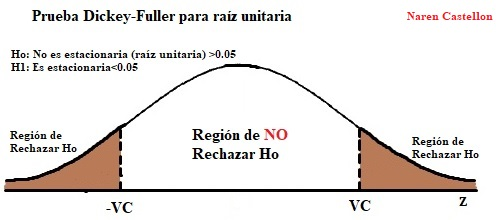

In [3]:
#@title
from IPython.display import Image
Image("/content/drive/MyDrive/_Curso Serie de tiempo/imagen/Prueba_Dickey-Fuller.jpg")

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Descargar datos de yahoo
import yfinance as yf
from yahoofinancials import YahooFinancials

import statsmodels.api as sm
import statsmodels.tsa.api as smt

from timeit import default_timer as timer

#import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = yf.download("AApl", 
                      start='2018-01-01', 
                      end='2022-03-28', 
                      progress=False)
df.head()
#df.to_csv("fb.csv")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.135761,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.128582,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.319626,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.790073,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.634853,82271200


In [ ]:
df = pd.read_csv("fb.csv")[["Date","Close"]]
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")

df = df.set_index("Date")

df.head()

,Close
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


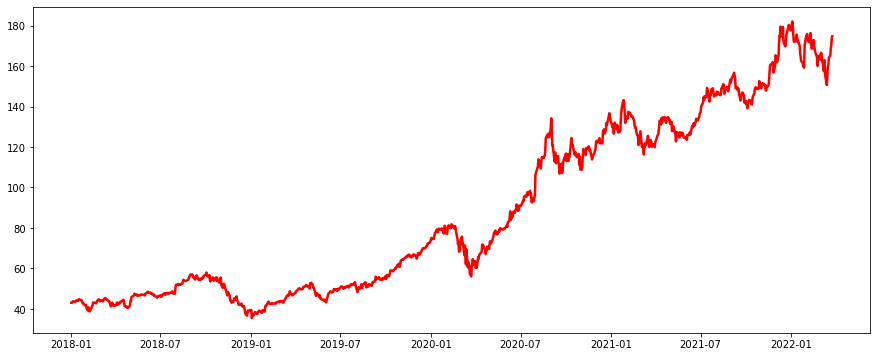

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df  ,lw=2.5, color="r",)
#plt.title("Grafico Original", fontsize=20);

Hacemos la prueba de `Dickey-Fuller` para probar estacionalidad

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")
        

In [ ]:
Augmented_Dickey_Fuller_Test_func(df,"Close")

Resultados de la prueba de Dickey-Fuller para columna: Close
Test Statistic                           0.353727
p-value                                  0.979680
No Lags Used                            20.000000
Número de observaciones utilizadas    1045.000000
Critical Value (1%)                     -3.436623
Critical Value (5%)                     -2.864310
Critical Value (10%)                    -2.568245
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


Dado que el valor $P-valor=0.979680$ es mayor que el nivel de significancia, tenemos que diferenciar la serie y veremos cómo se ve el gráfico de autocorrelación.

En esta ocasión haremos dos diferencia para revisar como nos da autocorrelación y luego volver a realizar la **Prueba Dickey-Fuller**.

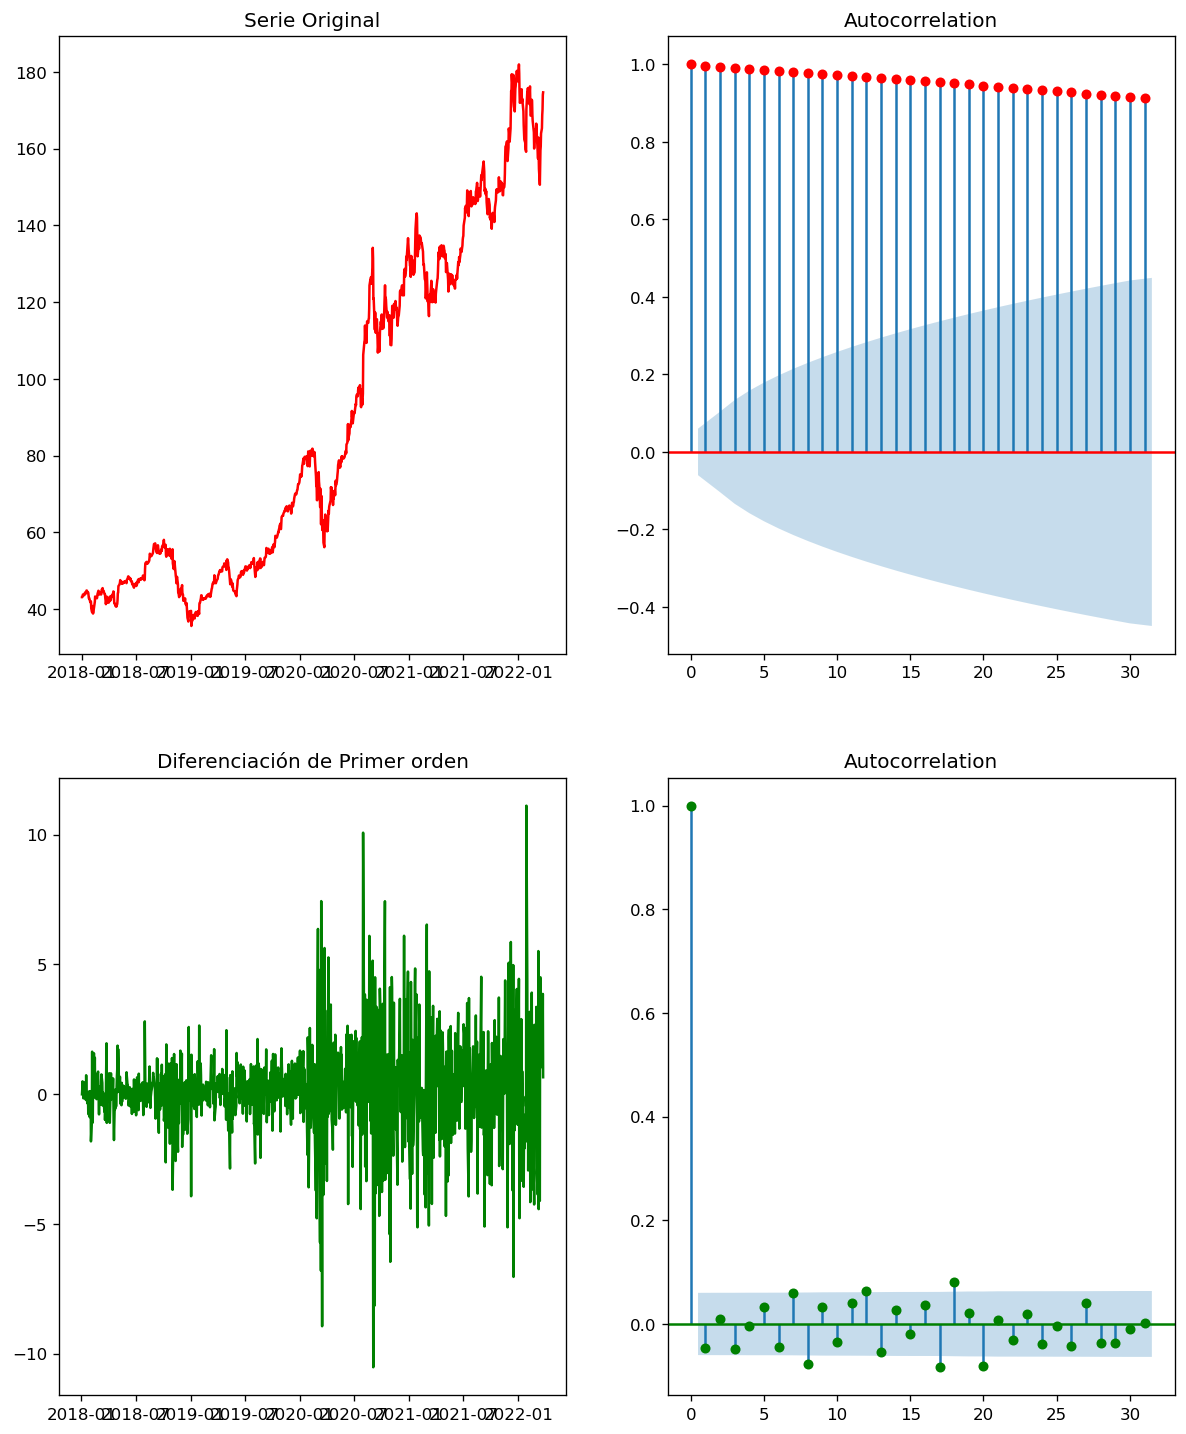

In [ ]:
plt.rcParams.update({'figure.figsize':(12,15), 'figure.dpi':120})
# Serie Original
fig, axes = plt.subplots(2, 2, sharex=False)
axes[0, 0].plot(df,color="r"); axes[0, 0].set_title('Serie Original')
plot_acf(df, ax=axes[0, 1], color="r")

# Primera diferenciación 
axes[1, 0].plot(df.diff(), color="g"); axes[1, 0].set_title("Diferenciación de Primer orden")
plot_acf(df.diff().dropna(), ax=axes[1, 1],color="g")

plt.show();

Para la serie anterior, la serie temporal alcanza la estacionariedad con dos órdenes de diferenciación. Pero al mirar el gráfico de autocorrelación para la segunda diferenciación, el retraso entra en la zona negativa lejana bastante rápido, lo que indica que la serie podría haber sido sobrediferenciada.

Por lo tanto, vamos a fijar provisionalmente el orden de diferenciación como 1 aunque la serie no sea perfectamente estacionaria (estacionariedad débil).

Ahora probaremos nuevamente la prueba Dickey-Fuller para la primera diferenciación.

In [ ]:
Augmented_Dickey_Fuller_Test_func(df.diff().dropna(),"ventas")

Resultados de la prueba de Dickey-Fuller para columna: ventas
Test Statistic                       -7.125712e+00
p-value                               3.624905e-10
No Lags Used                          1.900000e+01
Número de observaciones utilizadas    1.045000e+03
Critical Value (1%)                  -3.436623e+00
Critical Value (5%)                  -2.864310e+00
Critical Value (10%)                 -2.568245e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


El valor de $d=1$

## **6. Cómo encontrar el orden del término AR (p)**
El siguiente paso es identificar si el modelo necesita algún término de AR. Puede averiguar el número requerido de términos AR inspeccionando el gráfico de Autocorrelación parcial (PACF).

Pero, ¿qué es PACF?

La autocorrelación parcial se puede imaginar como la correlación entre la serie y su rezago, después de excluir las contribuciones de los rezagos intermedios. Entonces, PACF transmite la correlación pura entre un retraso y la serie. De esa manera, sabrá si ese retraso es necesario en el plazo de AR o no.

Entonces, ¿cuál es matemáticamente la fórmula para PACF?

La autocorrelación parcial del rezago (k) de una serie es el coeficiente de ese rezago en la ecuación de autorregresión de Y.

$$Y_t=\alpha_0+\alpha_1 Y_{t-1}+\alpha_2 Y_{t-2}+\alpha_3 Y_{t-3}$$

Es decir, suponga que si $Y_t$ es la serie actual y $Y_{t-1}$ es el rezago 1 de $Y$, entonces la autocorrelación parcial del rezago 3 ($Y_{t-3} $ ) es el coeficiente $\alpha_3 $ de en la ecuación anterior $Y_{t-3}$

Bien. Ahora, ¿cómo encontrar el número de términos AR?

Cualquier autocorrelación en una serie estacionaria se puede rectificar agregando suficientes términos AR. Entonces, inicialmente tomamos el orden del término AR como igual a tantos rezagos que cruzan el límite de significancia en la gráfica PACF.

Puede observar que el retraso PACF 1 es bastante significativo ya que está muy por encima de la línea de importancia. El retardo 2 y 3 también resulta significativo, logrando cruzar levemente el límite de significancia (región azul). Pero voy a ser conservador y tentativamente fijaré la p como 1.

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'): # [3]
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Gráfico de analisys de Serie de Tiempo\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

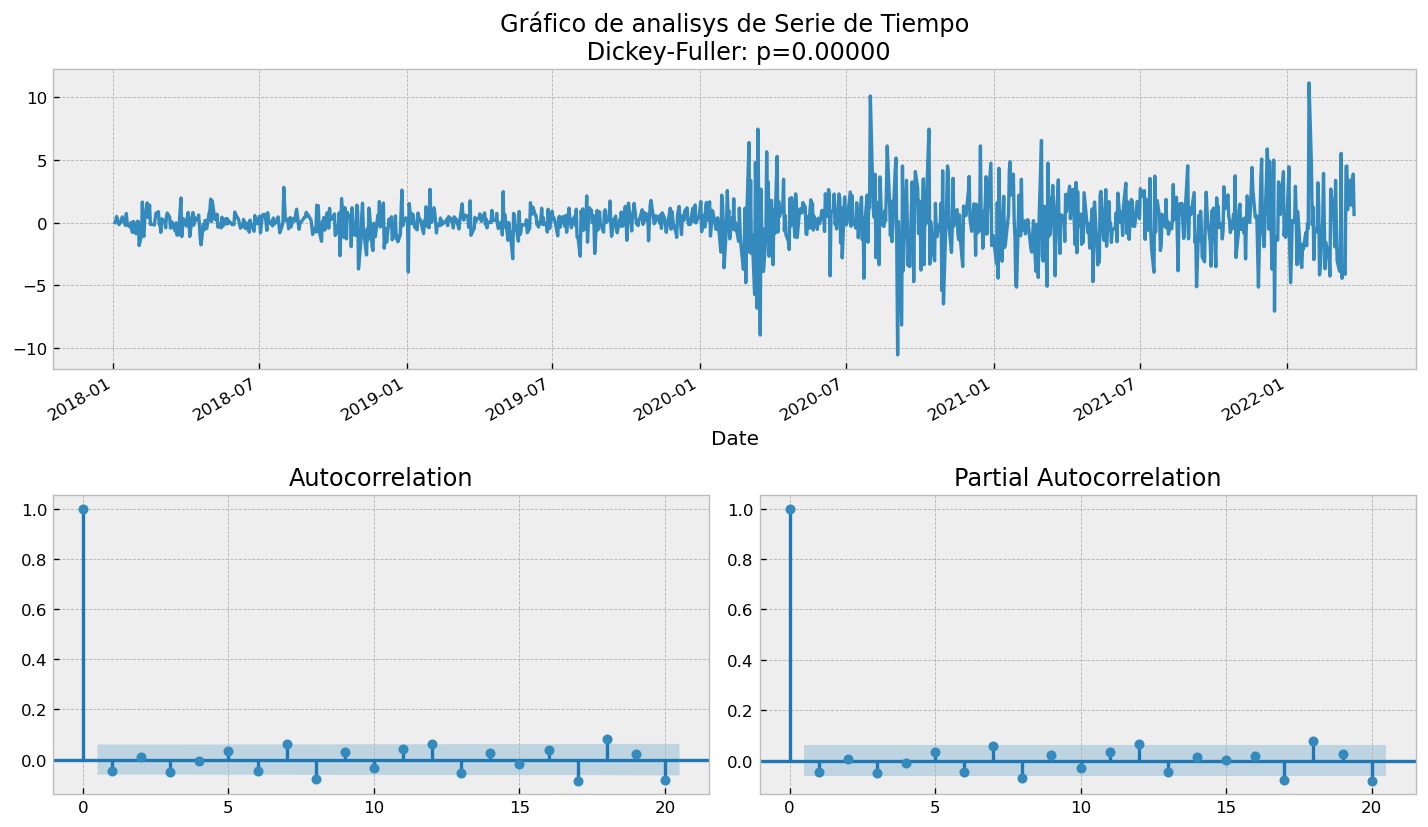

In [ ]:
tsplot(df["Close"].diff().dropna(), lags=20);

## **7. Cómo encontrar el orden del término MA (q)**
De la misma forma que observamos el gráfico PACF para el número de términos AR, puede mirar el gráfico ACF para el número de términos MA. Un término MA es técnicamente el error del pronóstico retrasado.

El ACF indica cuántos términos MA se requieren para eliminar cualquier autocorrelación en la serie estacionarizada.

Veamos el gráfico de autocorrelación de la serie diferenciada.

Un par de retrasos están muy por encima de la línea de importancia. Entonces, fijemos tentativamente q como 1. En caso de duda, opte por el modelo más simple que explique suficientemente la Y.

## **8. Cómo manejar si una serie de tiempo está ligeramente por debajo o por encima de la diferencia**
Puede suceder que su serie esté ligeramente subdiferenciada, que diferenciarla una vez más la haga ligeramente sobrediferenciada.

¿Cómo manejar este caso?

Si su serie está ligeramente por debajo de la diferencia, agregar uno o más términos AR adicionales generalmente lo compensa. Del mismo modo, si está ligeramente sobrediferenciado, intente agregar un término MA adicional.

## **9. Cómo construir el modelo ARIMA**
Ahora que ha determinado los valores de p, d y q, tiene todo lo necesario para ajustarse al modelo ARIMA. Usemos la implementación en package.ARIMA()statsmodels

In [ ]:
df=df.dropna()


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model1 = ARIMA(df["Close"], order=(1,1,1))
model_fit1 = model1.fit()
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1066
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2200.313
Date:                Wed, 30 Mar 2022   AIC                           4406.626
Time:                        17:16:24   BIC                           4421.538
Sample:                             0   HQIC                          4412.276
                               - 1066                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4354      0.378     -1.153      0.249      -1.176       0.305
ma.L1          0.3929      0.385      1.021      0.307      -0.361       1.147
sigma2         3.6479      0.088     41.341      0.000       3.475       3.821
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               889.77
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               8.45   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

El resumen del modelo revela mucha información. La tabla en el medio es la tabla de coeficientes donde los valores bajo 'coef' son los pesos de los términos respectivos.

Observe aquí que el coeficiente del término MA2 es cercano a cero y el valor P en 'P> | z |' columna es muy insignificante. Idealmente, debería ser menor que 0.05 para que la X respectiva sea significativa.

Entonces, reconstruyamos el modelo sin el término MA2.

In [ ]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(model_fit1.resid, lags=[10], return_df=True)


,lb_stat,lb_pvalue
10,6.432581,0.777705


Recordemos la prueba de **Ljung-Box**

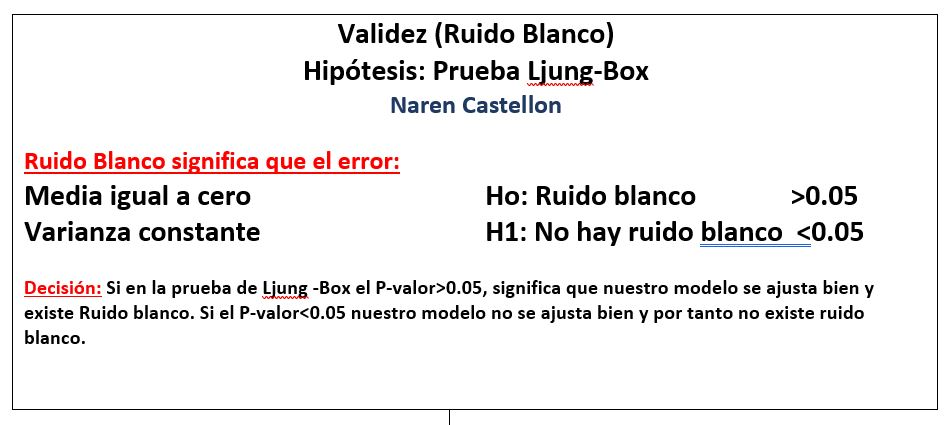

In [5]:
#@title
from IPython.display import Image
Image("/content/drive/MyDrive/_Curso Serie de tiempo/imagen/Prueba_Ljung-Box.JPG")

Los errores residuales parecen estar bien con una media cercana a cero y una varianza uniforme. Grafiquemos los valores reales contra los valores ajustados usando .plot_predict()

In [ ]:
# Actual vs Fitted
model_fit1.plot_predict(dynamic=False)
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

Cuando establece, los valores rezagados en la muestra se utilizan para la predicción.dynamic=False

Es decir, el modelo se entrena hasta el valor anterior para realizar la próxima predicción. Esto puede hacer que el pronóstico ajustado y los datos reales se vean artificialmente bien.

Entonces, parece que tenemos un modelo ARIMA decente. ¿Pero es eso lo mejor?

No puedo decir eso en este momento porque en realidad no hemos pronosticado el futuro ni hemos comparado el pronóstico con el rendimiento real.

Por lo tanto, la validación real que necesita ahora es la validación cruzada fuera de tiempo.

## **10. Cómo encontrar el modelo ARIMA óptimo manualmente usando la validación cruzada fuera de tiempo**
En la validación cruzada fuera de tiempo, retrocede unos pocos pasos en el tiempo y pronostica en el futuro tantos pasos hacia atrás. Luego, compara el pronóstico con los datos reales.

Para realizar una validación cruzada fuera de tiempo, debe crear el conjunto de datos de entrenamiento y prueba dividiendo la serie de tiempo en 2 partes contiguas en una proporción de aproximadamente 75:25 o una proporción razonable basada en la frecuencia de tiempo de la serie.

¿Por qué no estoy muestreando los datos de entrenamiento al azar, preguntas?

Esto se debe a que la secuencia de orden de la serie temporal debe estar intacta para poder usarla en la predicción.

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [ ]:
X = df[["value"]]
train, test = X[0:-15], X[-15:]

Ahora puede construir el modelo ARIMA en el conjunto de datos de entrenamiento, pronosticarlo y trazarlo.

In [ ]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model_3 = ARIMA(train, order=(1, 1, 1))  
fitted3 = model_3.fit(disp=-1) 

In [ ]:
# Forecast
fc,se, conf = fitted3.forecast(15, alpha=0.05)  # 95% conf

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, test.index)
lower_series = pd.Series(conf[:, 0] , test.index)
upper_series = pd.Series(conf[:, 1] , test.index)

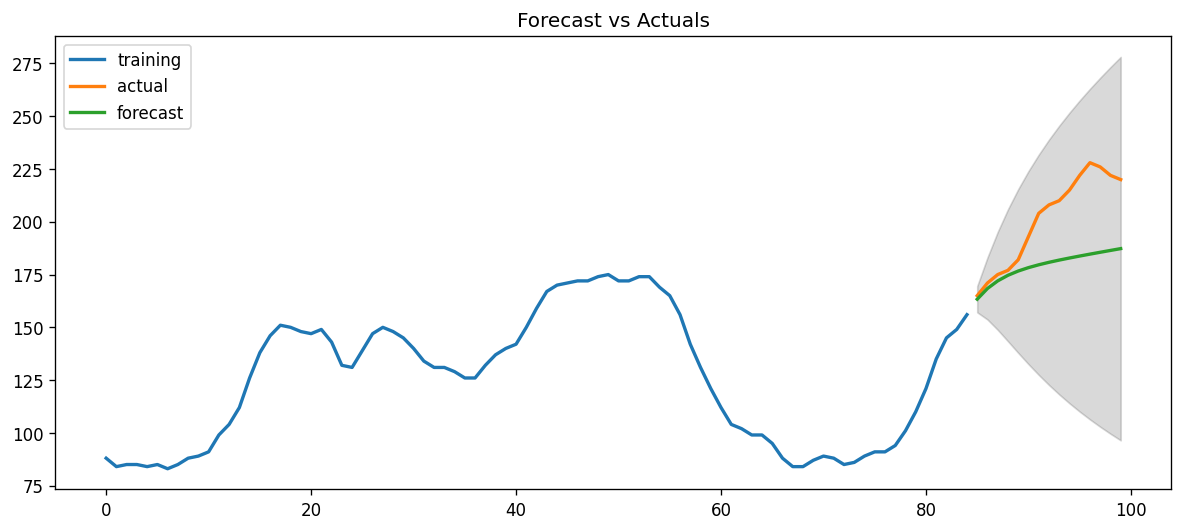

In [ ]:
# Plot
plt.figure(figsize=(12,5))
plt.plot(train, label='training', lw=2)
plt.plot(test, label='actual', lw=2)
plt.plot(fc_series, label='forecast',lw=2)
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=10)
plt.show()

A partir del gráfico, el modelo ARIMA (1,1,1) parece dar un pronóstico direccionalmente correcto. Y los valores reales observados se encuentran dentro de la banda de confianza del 95%. Eso parece estar bien.

Pero cada uno de los pronósticos previstos está consistentemente por debajo de los reales. Eso significa que, al agregar una pequeña constante a nuestro pronóstico, la precisión ciertamente mejorará. Por lo tanto, definitivamente hay margen de mejora.

Entonces, lo que voy a hacer es aumentar el orden de diferenciación a dos, que se establece y aumentar iterativamente p hasta 5 y luego q hasta 5 para ver qué modelo da menos AIC y también buscar un gráfico que dé datos reales y pronósticos más cercanos.d=2

Mientras hago esto, vigilo los valores P de los términos AR y MA en el resumen del modelo. Deben estar tan cerca de cero, idealmente, menos de 0.05.

In [ ]:
# Build Model
model_4 = ARIMA(train, order=(3, 2, 1))  
fitted4 = model_4.fit(disp=-1)  
print(fitted4.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   83
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -214.248
Method:                       css-mle   S.D. of innovations              3.153
Date:                Mon, 19 Jul 2021   AIC                            440.497
Time:                        17:16:40   BIC                            455.010
Sample:                             2   HQIC                           446.327
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0483      0.084      0.577      0.564      -0.116       0.212
ar.L1.D2.value     1.1386      0.109     10.399      0.000       0.924       1.353
ar.L2.D2.value    -0.5923      0.155

In [ ]:
# Forecast
fc, se, conf = fitted4.forecast(15, alpha=0.05)  # 95% conf

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

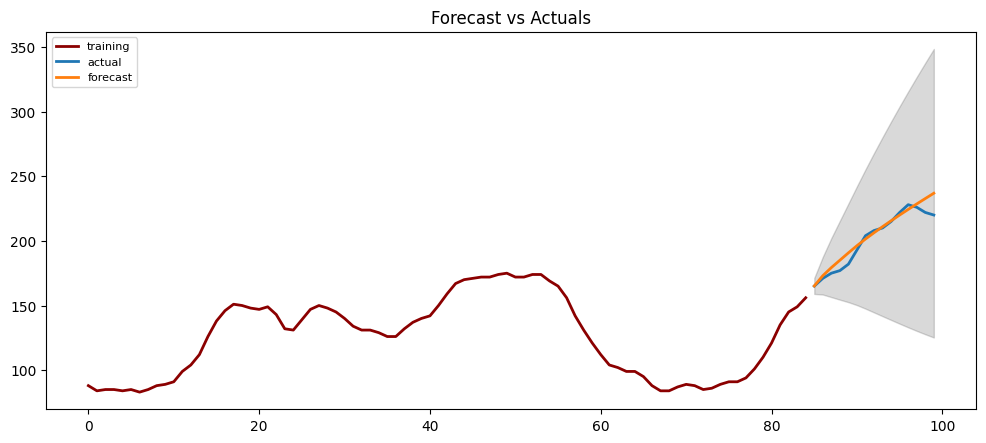

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training',lw=2, color="darkred")
plt.plot(test, label='actual',lw=2)
plt.plot(fc_series, label='forecast',lw=2)
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

El AIC se ha reducido de 515 a 440. Bien. Los valores P de los términos X son menos <0.05, lo cual es genial.

Entonces, en general, es mucho mejor.

Idealmente, debería retroceder varios puntos en el tiempo, por ejemplo, retroceder 1, 2, 3 y 4 trimestres y ver cómo se están desempeñando sus pronósticos en varios puntos del año.

Este es un gran ejercicio de práctica: intente retroceder 27, 30, 33, 36 puntos de datos y vea cómo funciona el pronóstico. El rendimiento del pronóstico se puede juzgar utilizando varias métricas de precisión que se analizan a continuación.

## **11. Métricas de precisión para el pronóstico de series de tiempo**
Las métricas de precisión comúnmente utilizadas para juzgar los pronósticos son:

* Error de porcentaje absoluto medio (MAPE)
* Error medio (ME)
* Error absoluto medio (MAE)
* Error de porcentaje medio (MPE)
* Error cuadrático medio (RMSE)
* Autocorrelación de error con retraso 1 (ACF1)
* Correlación entre el real y el pronóstico (corr)
* Error mínimo-máximo (minmax)

Por lo general, si está comparando pronósticos de dos series diferentes, se pueden usar MAPE, Correlación y Error Mín-Máx.

¿Por qué no utilizar las otras métricas?

Debido a que solo los tres anteriores son errores porcentuales que varían entre 0 y 1. De esa manera, puede juzgar qué tan bueno es el pronóstico independientemente de la escala de la serie.

Las otras métricas de error son cantidades. Eso implica que un RMSE de 100 para una serie cuya media está en 1000 es mejor que un RMSE de 5 para una serie en decenas. Por lo tanto, realmente no puede usarlos para comparar los pronósticos de dos series de tiempo escaladas diferentes.

In [ ]:
from sklearn import metrics

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Resultado de evaluación de la Metrica:-')
    print(f'MSE es : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE es : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE es : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE es : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 es : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
timeseries_evaluation_metrics_func(fc,test )

Resultado de evaluación de la Metrica:-
MSE es : 40.618201441672255
MSE es : 4.548323622564218
RMSE es : 6.373241046882838
MAPE es : 12.332708502316956
R2 es : 0.9135142532576609



Alrededor del 12.33% de MAPE implica que el modelo tiene una precisión de aproximadamente un 87,8% en la predicción.

Ahora sabe cómo construir un modelo ARIMA manualmente.

Pero en situaciones industriales, se le proporcionará una gran cantidad de series de tiempo para pronosticar y el ejercicio de pronóstico se repetirá con regularidad.

Por tanto, necesitamos una forma de automatizar el mejor proceso de selección de modelos.

## **12. Cómo hacer Auto Arima Forecast en Python**
Al igual que la función popular de R , el paquete proporciona una funcionalidad `similar.auto.arima()` `pmdarimaauto_arima()`

`auto_arima()` utiliza un enfoque paso a paso para buscar múltiples combinaciones de parámetros p, d, q y elige el mejor modelo que tiene el menor AIC.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [ ]:
df = pd.read_csv("usage_data.txt", names=['value'], header=0)

model_auto = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.93 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.43 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.14 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.27 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.19 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.23 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

## **13. Cómo interpretar las gráficas de residuos en el modelo ARIMA**
Repasemos las gráficas de residuos usando stepwise_fit.

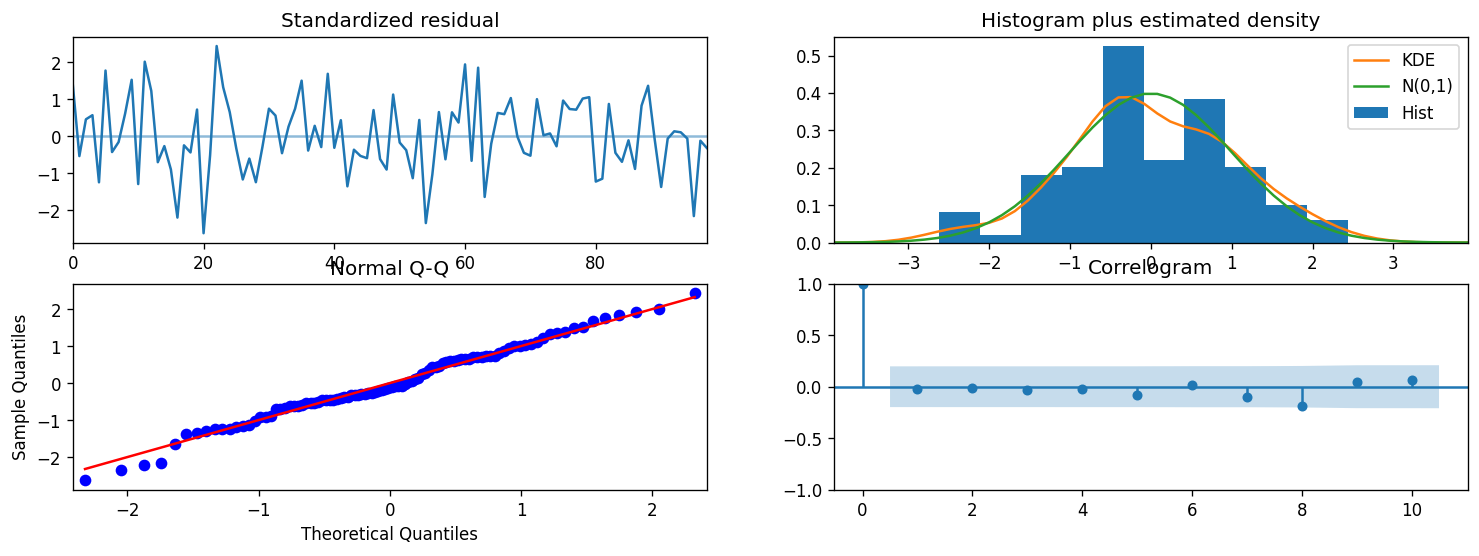

In [ ]:
model_auto.plot_diagnostics(figsize=(15,5))
plt.show()

Entonces, ¿cómo interpretar los diagnósticos de la trama?

Arriba a la izquierda: los errores residuales parecen fluctuar alrededor de una media de cero y tienen una varianza uniforme.

Arriba a la derecha: la gráfica de densidad sugiere una distribución normal con media cero.

Abajo a la izquierda: todos los puntos deben estar perfectamente alineados con la línea roja. Cualquier desviación significativa implicaría que la distribución está sesgada.

Abajo a la derecha: el correlograma, también conocido como gráfico ACF, muestra que los errores residuales no están autocorrelacionados. Cualquier autocorrelación implicaría que existe algún patrón en los errores residuales que no se explican en el modelo. Por lo tanto, deberá buscar más X (predictores) en el modelo.

En general, parece encajar bien. Pronostiquemos.

In [ ]:
# Forecast
n_periods = 24
fc, confint = model_auto.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

In [ ]:
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

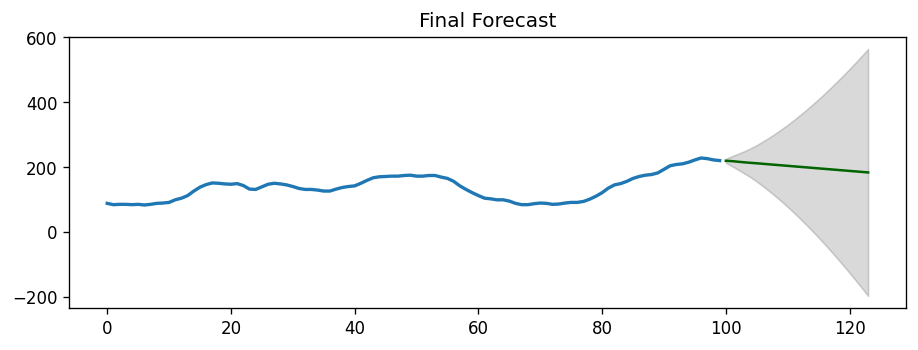

In [ ]:
# Plot
plt.plot(df.value, lw=2)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

## **14. Cómo construir automáticamente el modelo SARIMA en Python**
El problema con el modelo ARIMA simple es que no admite la estacionalidad.

Si su serie temporal tiene una estacionalidad definida, elija SARIMA, que utiliza la diferenciación estacional.

La diferenciación estacional es similar a la diferenciación regular, pero, en lugar de restar términos consecutivos, resta el valor de la temporada anterior.

Entonces, el modelo se representará como SARIMA (p, d, q) x (P, D, Q), donde, P, D y Q son SAR, orden de diferenciación estacional y términos SMA respectivamente y 'x'es la frecuencia del tiempo. serie.

Si su modelo tiene patrones estacionales bien definidos, aplique D = 1 para una frecuencia determinada 'x'.

Aquí hay algunos consejos prácticos sobre la construcción del modelo SARIMA:

Como regla general, configure los parámetros del modelo de manera que D nunca exceda uno. Y la diferenciación total 'd + D' nunca excede 2. Intente mantener solo los términos SAR o SMA si su modelo tiene componentes estacionales.

Construyamos un modelo SARIMA sobre 'a10'el conjunto de datos de ventas de medicamentos.

In [ ]:
# Import
data = pd.read_csv("a10.txt", parse_dates=['date'], index_col='date')

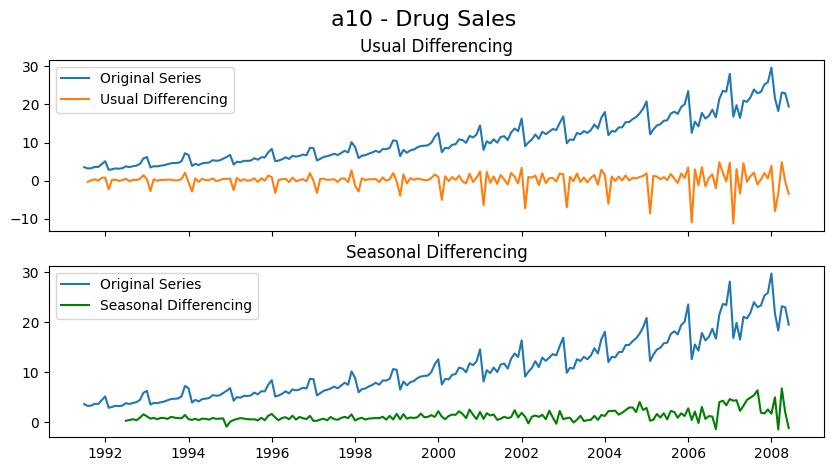

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

Como puede ver claramente, los picos estacionales están intactos después de aplicar la diferenciación habitual (retraso 1). Considerando que, se rectifica después de la diferenciación estacional.

Construyamos el modelo SARIMA usando pmdarima's . Para hacer eso, debe establecer , establecer la frecuencia de las series mensuales y hacer cumplir

auto_arima()seasonal=Truem=12D=1

In [ ]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=1.86 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.65 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.37 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.68 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=4.88 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=1.64 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.898, Time=6.47 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.58 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=1.61 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.41 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.73 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.951
Date:                            Fri, 16 Jul 2021   AIC                            523.901
Time:                                    14:47:25   BIC                            549.961
Sample:                                         0   HQIC                           534.456
                                            - 204                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0052      0.009      0.585      0.558      -0.012       0.023
ar.L1          0.9770      0.018     53.510      0.000       0.941       1.013
ma.L1         -0.9140      0.056    -16.217      0.000      -1.025      -0.804
ma.L2          0.2158      0.059      3.666      0.000       0.100       0.331
ar.S.L12       0.8419      0.154      5.453      0.000       0.539       1.145
ma.S.L12      -1.5860      0.176     -9.028      0.000      -1.930      -1.242
ma.S.L24       0.7690      0.111      6.928      0.000       0.551       0.987
sigma2         0.7469      0.066     11.313      0.000       0.618       0.876
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               141.94
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):              14.46   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

El modelo ha estimado el AIC y los valores P de los coeficientes parecen significativos. Veamos la gráfica de diagnóstico residual.

El mejor modelo tiene un AIC de 528,6 y los valores P son significativos.SARIMAX(3, 0, 0)x(0, 1, 1, 12)

Pronostiquemos para los próximos 24 meses.

In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

In [ ]:
# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

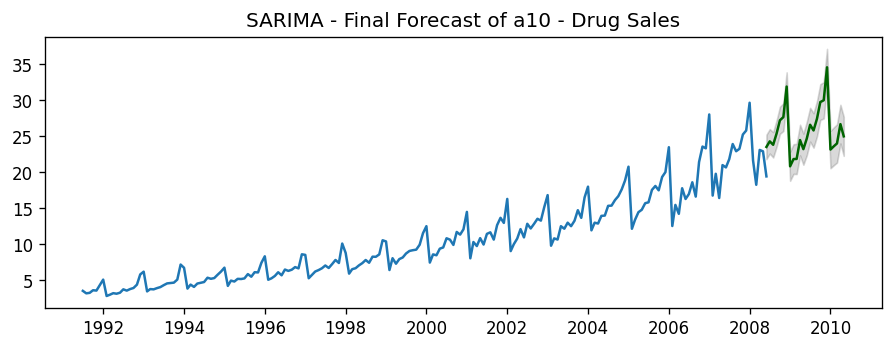

In [ ]:
# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

Allí tiene un buen pronóstico que captura el patrón de demanda estacional esperado.

## **15. Cómo construir el modelo SARIMAX con variable exógena**
El modelo SARIMA que construimos es bueno. Normalmente me detendría aquí.

Pero en aras de la completitud, intentemos forzar un predictor externo, también llamado "variable exógena" en el modelo. Este modelo se llama modelo SARIMAX.

El único requisito para utilizar una variable exógena es también conocer el valor de la variable durante el período de pronóstico.

En aras de la demostración, voy a utilizar el índice estacional de la descomposición estacional clásica en los últimos 36 meses de datos.

¿Por qué el índice estacional? ¿No está SARIMA ya modelando la estacionalidad, preguntas?

Estás en lo correcto.

Pero también, quiero ver cómo se ve el modelo si forzamos el patrón de estacionalidad reciente en el entrenamiento y el pronóstico.

En segundo lugar, esta es una buena variable para fines de demostración. Entonces puede usar esto como una plantilla y conectar cualquiera de sus variables en el código. El índice estacional es una buena variable exógena porque repite cada ciclo de frecuencia, 12 meses en este caso.

Por lo tanto, siempre sabrá qué valores tendrá el índice estacional para los pronósticos futuros.

In [ ]:
# Import Data
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

Calculemos el índice estacional para que pueda forzarse como un predictor (exógeno) del modelo SARIMAX.

In [ ]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [ ]:
# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

In [ ]:
# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

La variable exógena (índice estacional) está lista. Construyamos el modelo SARIMAX.

In [ ]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=536.818, Time=2.47 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=626.061, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=598.068, Time=1.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=613.475, Time=0.86 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=759.274, Time=0.42 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=561.407, Time=0.91 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=5.84 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=538.817, Time=7.46 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=545.106, Time=1.68 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=539.533, Time=8.61 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=596.467, Time=0.67 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=531.829, Time=2.49 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=557.198, Time=0.99 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=3.53 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.969
Date:                            Fri, 16 Jul 2021   AIC                            525.938
Time:                                    14:29:07   BIC                            555.255
Sample:                                07-01-1991   HQIC                           537.811
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0051      0.009      0.571      0.568      -0.012       0.023
seasonal_index  1.267e-06   6651.720    1.9e-10      1.000    -1.3e+04     1.3e+04
ar.L1              0.9767      0.019     52.549      0.000       0.940       1.013
ma.L1             -0.9075      0.057    -16.045      0.000      -1.018      -0.797
ma.L2              0.2183      0.058      3.753      0.000       0.104       0.332
ar.S.L12           0.8452      0.153      5.521      0.000       0.545       1.145
ma.S.L12          -1.5780      0.174     -9.088      0.000      -1.918      -1.238
ma.S.L24           0.7605      0.109      6.992      0.000       0.547       0.974
sigma2             0.7431      0.064     11.540      0.000       0.617       0.869
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):               144.69
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):              14.51   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Entonces, tenemos el modelo con el término exógeno. Pero el coeficiente es muy pequeño para x1, por lo que la contribución de esa variable será insignificante. Vamos a pronosticarlo de todos modos.

Efectivamente, hemos forzado el último efecto estacional de los últimos 3 años en el modelo en lugar de toda la historia.

Muy bien, pronostiquemos para los próximos 24 meses. Para ello, necesita el valor del índice estacional para los próximos 24 meses.

In [ ]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.value, 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

NameError: name 'model' is not defined

In [ ]:
# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

In [ ]:
# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()

## **Transformación Box-Cox**
La transformación de raíz cuadrada y la transformación logarítmica pertenece a una clase de transformaciones llamadas transformación de potencia.

La **Transformación Box-Cox** es un método de transformación de datos configurable que admite tanto la transformación de raíz cuadrada como la de registro, así como un conjunto de transformaciones relacionadas.

Más que eso, se puede configurar para evaluar un conjunto de transformaciones automáticamente y seleccionar la que mejor se adapte. Se puede considerar como una herramienta eléctrica para solucionar los cambios basados en el poder de una serie temporal. La serie resultante puede ser más lineal y la distribución resultante más gaussiana o uniforme, dependiendo del proceso subaycent que la generó.

La biblioteca `scipy.stats` proporciona una implementación de la **Transformación Box-Cox**. La función `boxcox()` toma un argumento, llamado *lambda*, que controla el tipo de transformación a realizar.

Veamos algunos valores más comunes de *lambda*

* $\lambda=-1$ es una transformación recíproca.
* $\lambda=-0.5$ es una transformación raíz cuadrada recíproca.
* $\lambda=0$ es una transformación logarítmica.
* $\lambda=0.5$ es una transformación de raíz cuadrada.
* $\lambda=1$ no es una transformación.

In [ ]:
import pandas as pd
from scipy.stats import boxcox
from matplotlib import pyplot

In [ ]:
df = pd.read_csv("usage_data.txt", names=['value'], header=0)
df_boxcox=boxcox(df ["value"], lmbda=0.0)

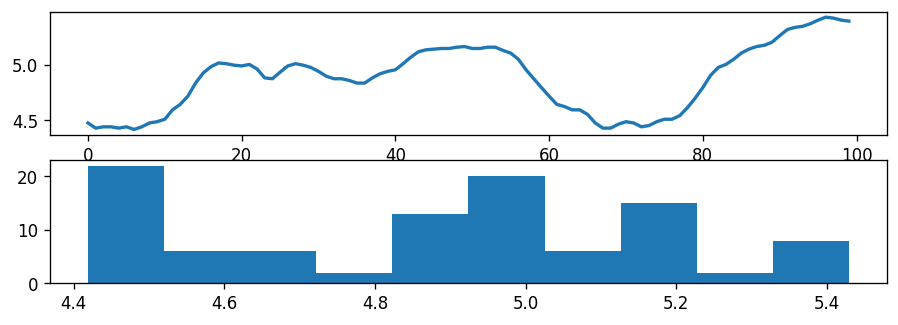

In [ ]:
pyplot.figure(1)

pyplot.subplot(211)
pyplot.plot(df_boxcox, lw=2)

#histograma
pyplot.subplot(212)
pyplot.hist(df_boxcox)

pyplot.show()

In [ ]:
df = pd.read_csv("usage_data.txt", names=['value'], header=0)
df, df_boxcox=boxcox(df ["value"])

print("Lambda:%f" % df_boxcox)

Lambda:0.141314


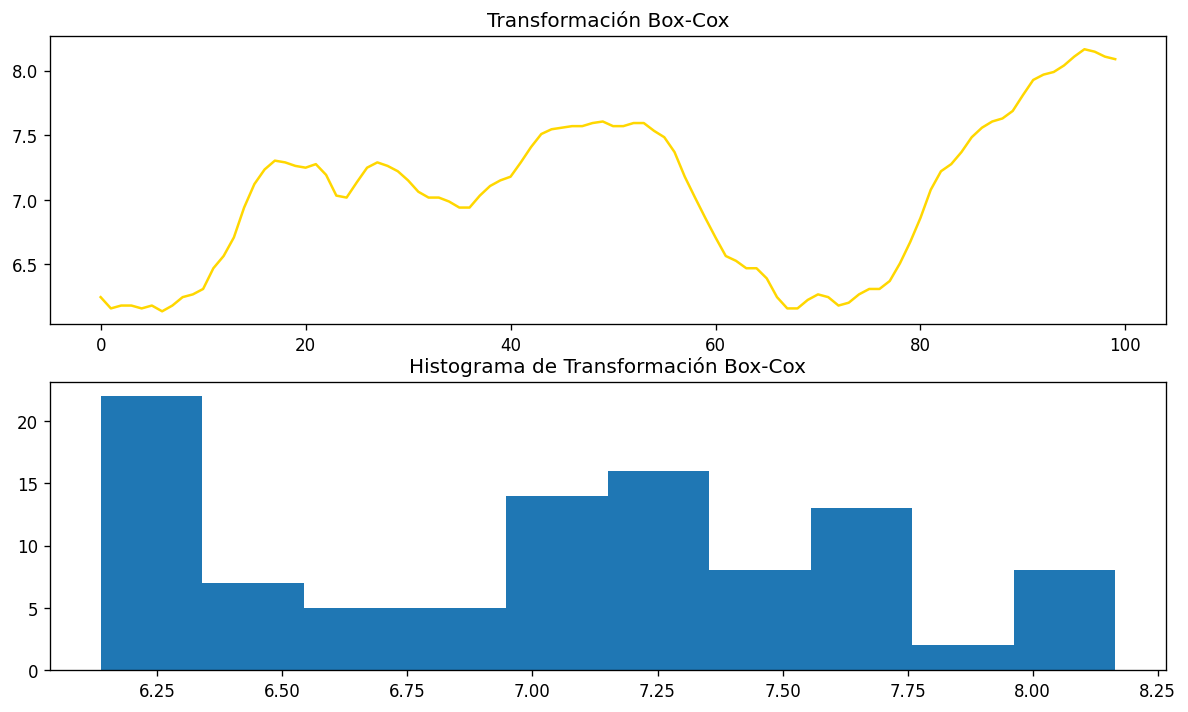

In [ ]:
#plt.figure(figsize=(12,5)
pyplot.figure(figsize=(12,7))

pyplot.subplot(211)
pyplot.plot(df, lw=1.5, color="gold")
pyplot.title("Transformación Box-Cox")
#histograma
pyplot.subplot(212)
pyplot.hist(df)
pyplot.title("Histograma de Transformación Box-Cox")

pyplot.show()

# Referencia bibliográfica